In [ ]:
#@title Текст заголовка по умолчанию
from google.colab import files # Для работы с файлами 
import numpy as np # Для работы с данными 
import pandas as pd # Для работы с таблицами
import matplotlib.pyplot as plt # Для вывода графиков
import os # Для работы с файлами
%matplotlib inline

from tensorflow.keras import utils # Для работы с категориальными данными
from tensorflow.keras.models import Sequential, Model # Полносвязная модель
from tensorflow.keras.layers import Dense, Dropout, SpatialDropout1D, BatchNormalization, Embedding, Flatten, Activation, concatenate, Input # Слои для сети
from tensorflow.keras.preprocessing.text import Tokenizer # Методы для работы с текстами и преобразования их в последовательности
from tensorflow.keras.preprocessing.sequence import pad_sequences # Метод для работы с последовательностями
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Embedding, Flatten, Activation
# Загружаем сверточные слои
from tensorflow.keras.layers import Conv1D, SpatialDropout1D, MaxPooling1D, GlobalAveragePooling1D, GlobalMaxPooling1D
# Загружаем рекуррентные слои
from tensorflow.keras.layers import LSTM, GRU, SimpleRNN, Bidirectional
# Загружаем алгоритмы обучения/оптимизации
#from tensorflow.python.keras.optimizers import Adam, RMSprop
from tensorflow.keras.optimizers import Adam, RMSprop
from sklearn.preprocessing import LabelEncoder # Метод кодирования тестовых лейблов
from sklearn.model_selection import train_test_split # Для разделения выборки на тестовую и обучающую
from google.colab import drive # Для работы с Google Drive
import time # Импортируем библиотеку time
import os

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
!unzip -q '/content/drive/My Drive/DATAS/diseases.zip' -d /content/

In [ ]:
classes = [x[:-4] for x in os.listdir('Болезни/')]
n = len(classes)
xLen = 50
classes

['Энтерит',
 'Панкреатит',
 'Язва',
 'Колит',
 'Аппендицит',
 'Дуоденит',
 'Гепатит',
 'Гастрит',
 'Эзофагит',
 'Холицестит']

In [ ]:
data = []
for name in classes :
  data.append(open('Болезни/' + name + '.txt').read().replace("\n", " "))

In [ ]:
maxWordsCount = 5000
tokenizer = Tokenizer(num_words = maxWordsCount, filters='!"$%&()*+,-–—./…:;<=>?@[\\]^_`{|}~«»\t\n\xa0', lower = True, split = ' ', oov_token = 'unknown', char_level = False)
tokenizer.fit_on_texts(data)
items = list(tokenizer.word_index.items())
data = tokenizer.texts_to_sequences(data)

In [ ]:
print(len(items))
items[:10]

1981


[('unknown', 1),
 ('в', 2),
 ('и', 3),
 ('боль', 4),
 ('тошнота', 5),
 ('или', 6),
 ('рвота', 7),
 ('боли', 8),
 ('живота', 9),
 ('при', 10)]

In [ ]:
def getSetFromIndexes(wordIndexes, xLen, step): # функция принимает последовательность индексов, размер окна, шаг окна
  xSample = [] # Объявляем переменную для векторов
  wordsLen = len(wordIndexes) # Считаем количество слов
  index = 0 # Задаем начальный индекс 

  while (index + xLen <= wordsLen):# Идём по всей длине вектора индексов
    xSample.append(wordIndexes[index:index+xLen]) # "Откусываем" векторы длины xLen
    index += step # Смещаеммся вперёд на step
    
  return xSample

**BagOfWords**

In [ ]:
x_test = []
y_test = []
x_train = []
y_train = []
for i in range(n) :
  for j in getSetFromIndexes(data[i][:- int(len(data[i]) * 0.2)], xLen, 10) :
      x_train.append(j)
      y_train.append(utils.to_categorical(i, n))
  for j in getSetFromIndexes(data[i][-int(len(data[i]) * 0.2) : ], xLen, 10) :
      x_test.append(j)
      y_test.append(utils.to_categorical(i, n))
x_test = tokenizer.sequences_to_matrix(x_test, mode='binary')
y_test = np.array(y_test)
x_train = tokenizer.sequences_to_matrix(x_train, mode='binary')
y_train = np.array(y_train)

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size = 0.25, random_state = 42) 

Epoch 1/10
20/20 [==============================] - 0s 24ms/step - loss: 2.0892 - accuracy: 0.2822 - mae: 0.1707 - val_loss: 2.1310 - val_accuracy: 0.2137 - val_mae: 0.1742
Epoch 2/10
20/20 [==============================] - 0s 13ms/step - loss: 1.5870 - accuracy: 0.5889 - mae: 0.1526 - val_loss: 2.0603 - val_accuracy: 0.2137 - val_mae: 0.1723
Epoch 3/10
20/20 [==============================] - 0s 13ms/step - loss: 1.2371 - accuracy: 0.7749 - mae: 0.1337 - val_loss: 1.9546 - val_accuracy: 0.4188 - val_mae: 0.1694
Epoch 4/10
20/20 [==============================] - 0s 13ms/step - loss: 0.9378 - accuracy: 0.8989 - mae: 0.1124 - val_loss: 1.8669 - val_accuracy: 0.6581 - val_mae: 0.1676
Epoch 5/10
20/20 [==============================] - 0s 14ms/step - loss: 0.7214 - accuracy: 0.9462 - mae: 0.0947 - val_loss: 1.7077 - val_accuracy: 0.4444 - val_mae: 0.1581
Epoch 6/10
20/20 [==============================] - 0s 13ms/step - loss: 0.5659 - accuracy: 0.9804 - mae: 0.0792 - val_loss: 1.5671 - v

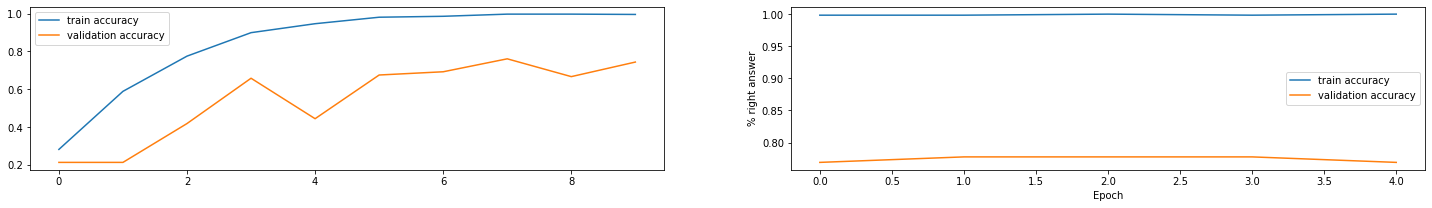

In [ ]:
from tensorflow.keras.optimizers import Adam, Adadelta
model = Sequential()
model.add(BatchNormalization())
model.add(Dense(128, input_dim = maxWordsCount, activation = 'sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(64,  activation = 'sigmoid'))
model.add(Dropout(0.3))
model.add(Dense(n, activation='softmax'))
batch_size = [32, 32]
lr = [0.001, 0.0001]
epoch = [10, 5]

T = 2
fig, axs = plt.subplots(1, T, figsize=(25, 3))
for i in range(T) :
  model.compile(loss="categorical_crossentropy", optimizer=RMSprop(lr[i]), metrics=["accuracy", 'mae'])

  history = model.fit(x_train, 
                      y_train, 
                      batch_size=batch_size[i], 
                      epochs=epoch[i],
                      validation_data=(x_test, y_test),
                      verbose=1)
  axs[i].plot(history.history['accuracy'], label = 'train accuracy')
  axs[i].plot(history.history['val_accuracy'], label = 'validation accuracy')
  axs[i].legend()
plt.xlabel('Epoch')
plt.ylabel('% right answer')
plt.show()

**Рекурентные сети**

In [ ]:
x_test = []
y_test = []
x_train = []
y_train = []
for i in range(n) :
  for j in getSetFromIndexes(data[i][:-int(len(data[i]) * 0.2)], xLen, 10) :
      x_train.append(j)
      y_train.append(utils.to_categorical(i, n))
  for j in getSetFromIndexes(data[i][-int(len(data[i]) * 0.2) : ], xLen, 10) :
      x_test.append(j)
      y_test.append(utils.to_categorical(i, n))
x_test = np.array(x_test)
y_test = np.array(y_test)
x_train = np.array(x_train)
y_train = np.array(y_train)

In [ ]:
#x_train, x_test, y_train, y_test = train_test_split(X, Y, shuffle = True, test_size = 0.25, random_state = 42) 

In [ ]:
print(x_train.shape)

(613, 50)


Only LSTM

Epoch 1/50
20/20 [==============================] - 2s 82ms/step - loss: 2.2548 - accuracy: 0.1648 - val_loss: 2.2539 - val_accuracy: 0.1624
Epoch 2/50
20/20 [==============================] - 1s 45ms/step - loss: 1.9785 - accuracy: 0.2463 - val_loss: 2.3858 - val_accuracy: 0.1026
Epoch 3/50
20/20 [==============================] - 1s 45ms/step - loss: 1.8730 - accuracy: 0.2594 - val_loss: 2.2826 - val_accuracy: 0.1026
Epoch 4/50
20/20 [==============================] - 1s 46ms/step - loss: 1.7807 - accuracy: 0.2741 - val_loss: 2.2155 - val_accuracy: 0.2137
Epoch 5/50
20/20 [==============================] - 1s 45ms/step - loss: 1.7126 - accuracy: 0.3687 - val_loss: 2.1708 - val_accuracy: 0.2137
Epoch 6/50
20/20 [==============================] - 1s 46ms/step - loss: 1.5988 - accuracy: 0.4046 - val_loss: 2.1627 - val_accuracy: 0.2137
Epoch 7/50
20/20 [==============================] - 1s 46ms/step - loss: 1.4759 - accuracy: 0.4470 - val_loss: 2.2000 - val_accuracy: 0.2137
Epoch 8/50
20

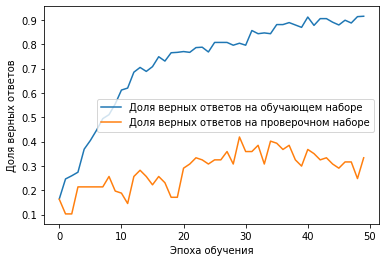

In [ ]:

model = Sequential()
model.add(Embedding(maxWordsCount, 5, input_length = xLen))
model.add(SpatialDropout1D(0.2))
model.add(BatchNormalization())
model.add(LSTM(5, return_sequences = True))
model.add(LSTM(30))
model.add(Dense(n, activation='softmax')) 

model.compile(optimizer='rmsprop', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

history = model.fit(x_train, 
                    y_train, 
                    epochs=50,
                    batch_size=32,
                    validation_data=(x_test, y_test))

plt.plot(history.history['accuracy'], 
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'], 
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()